# LAB 2

В этом ноутбуке отчет по результатам обучения всех моделей.

## TASK
#### Neural Machine Translation in the wild
In the third homework you are supposed to get the best translation you can for the EN-RU translation task.

Basic approach using RNNs as encoder and decoder is implemented for you. 

Your ultimate task is to use the techniques we've covered, e.g.

* Optimization enhancements (e.g. learning rate decay)

* CNN encoder (with or without positional encoding)

* attention/self-attention mechanism

* pretraining the language model

* [Byte Pair Encoding](https://github.com/rsennrich/subword-nmt)

* or just fine-tunning BERT ;)

to improve the translation quality. 

__Please use at least three different approaches/models and compare them (translation quality/complexity/training and evaluation time).__

Write down some summary on your experiments and illustrate it with convergence plots/metrics and your thoughts. Just like you would approach a real problem.

In [1]:
import pandas as pd
from IPython.display import Image

In [2]:
def get_examples(good_str, bad_str):
    goos_ex = eval(good_str)
    print('GOOD EXAMPLES:')
    for i, ex in enumerate(goos_ex):
        print(f'Example {i + 1}')
        print(f'src: {ex["src"]}')
        print(f'trg: {ex["trg"]}')
        print(f'gen: {ex["gen"]}')
    print()
    bad_ex = eval(bad_str)
    print('BAD EXAMPLES:')
    for i, ex in enumerate(bad_ex):
        print(f'Example {i + 1}')
        print(f'src: {ex["src"]}')
        print(f'trg: {ex["trg"]}')
        print(f'gen: {ex["gen"]}')

## REPORT

Всего было проведено 5 экспериментов:
1. Baseline model
2. CNN as encoder
3. Attention model
4. Attention + positional encoder model
5. Transformer model

In [3]:
results = pd.read_csv('results/model_results.csv')

### EXPERIMENT 1: BASELINE MODEL NOTEBOOK
Реализация: <a href='https://github.com/AnnaSmelova/NLP/blob/main/MADE%20NLP%20Course/Lab_2_Neural_Machine_Translation/exp_01_baseline_model.py'>exp_01_baseline_model.py</a> <br>
Эксперимент: <a href='https://github.com/AnnaSmelova/NLP/blob/main/MADE%20NLP%20Course/Lab_2_Neural_Machine_Translation/Lab_2_Neural_Machine_Translation_exp_1_baseline.ipynb'>Lab_2_Neural_Machine_Translation_exp_1_baseline.ipynb</a>

В этом эксперименте обучала baseline-модель, только изменила 2 слоя на 4 и попробовала 3 разных способа препроцессинга. <br>
Для каждого способа обучала по 20 эпох.<br>
Цели: понять, какой способ токенизации дает лучшее качество, и оценить базовый BLEU.

In [4]:
results_exp1 = results.iloc[[0,1,2]].copy()
results_exp1

,model_name,epochs_num,train_loss,valid_loss,train_PPL,valid_PPL,BLEU,train_mins,train_secs,eval_mins,eval_secs,batch_size,good_ex,bad_ex
0,baseline_base_prep,20,2.661457,4.706754,14.317139,110.692270,17.472842,25,51,0,4,128,[{'src': 'имеется бесплатная частная парковка ...,[{'src': 'на ферме производится собственное ви...
1,baseline_bpe_prep,20,3.472429,5.131070,32.214889,169.197998,12.162282,26,39,0,3,128,"[{'src': 'здесь работает бесплатный wifi .', '...",[{'src': 'все просторные номера оформлены в ма...
2,baseline_spacy_emb,20,2.678203,4.598027,14.558907,99.288267,14.592864,25,37,0,4,128,[{'src': 'гостям предоставляется бесплатный wi...,"[{'src': 'гостевой дом', 'trg': 'the', 'gen': ..."


#### 1.1 Baseline + base preprocessing via WordPunctTokenizer

Результат обучения baseline-модели: на графике слева показан train-loss на последней 20-й эпохе, справа общий график для всех эпох для valid-loss и train-loss.<br>
BLEU = 17.47.<br>
Видно, что на последней эпохе train-loss довольно шумный, но все еще падает, valid-loss тоже медленно, но уменьшался. Наверное, можно было бы обучить еще несколько эпох и получить качество чуть повыше, но сильно выше вряд ли.

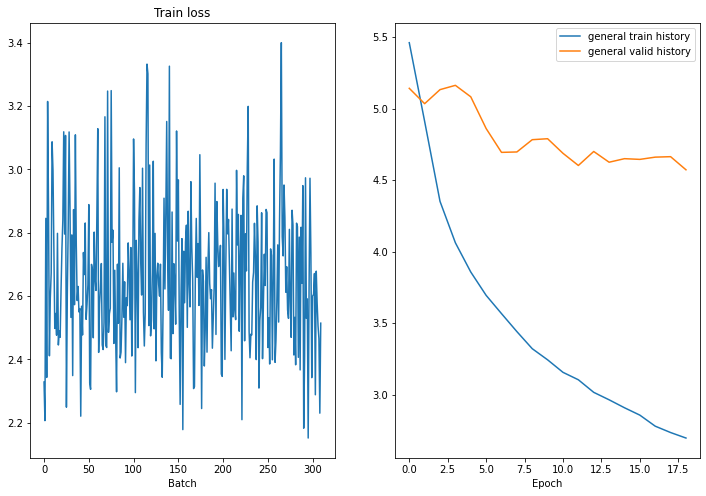

In [5]:
Image('results/graphs/exp01_g01.png')

In [6]:
get_examples(results_exp1['good_ex'][0], results_exp1['bad_ex'][0])

GOOD EXAMPLES:
Example 1
src: имеется бесплатная частная парковка .
trg: free private parking is available .
gen: free private parking is available .
Example 2
src: на территории можно взять напрокат велосипед и автомобиль . в окрестностях пользуются популярностью занятия велоспортом .
trg: bike hire and car hire are available at the property and the area is popular for cycling .
gen: car hire and car hire are available at the property and the area is popular for cycling .
Example 3
src: в номерах имеются телевизор с плоским экраном , а также собственная ванная комната с бесплатными туалетно - косметическими принадлежностями .
trg: rooms include a flat - screen tv and a private bathroom with free toiletries .
gen: the rooms include a flat - screen tv and a private bathroom with free toiletries .

BAD EXAMPLES:
Example 1
src: на ферме производится собственное вино .
trg: the farm produces its own wine .
gen: guests can also enjoy a variety of
Example 2
src: отель удобно расположен для с

#### 1.2 Baseline + BPE preprocessing via subword_nmt

BPE показал себя хуже, чем базовый препроцессинг: ошибка и на train, и на valid выборках оказалась выше, а показатель BLEU - ниже.<br>
BLEU = 12.16.

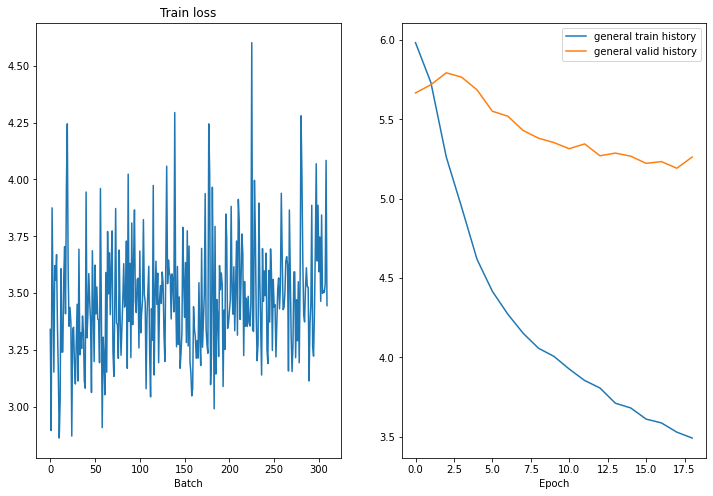

In [7]:
Image('results/graphs/exp01_g02.png')

In [8]:
get_examples(results_exp1['good_ex'][1], results_exp1['bad_ex'][1])

GOOD EXAMPLES:
Example 1
src: здесь работает бесплатный wifi .
trg: free wifi access is available .
gen: free wifi access is available .
Example 2
src: на территории или в окрестностях можно заняться различными видами дея@@ тель@@ ности , включая дартс и велоспорт .
trg: an array of activities can be enjoyed on site or in the surroundings , including cycling and darts .
gen: an array of activities can be enjoyed on site or in the surroundings , including cycling and hiking .
Example 3
src: апартаменты оснащены телевизором с плоским экраном и спутниковыми каналами .
trg: a flat - screen tv with satellite channels is offered .
gen: the flat - screen tv with satellite channels is offered .

BAD EXAMPLES:
Example 1
src: все просторные номера оформлены в марок@@ кан@@ ском бер@@ бер@@ ском стиле .
trg: each spacious room has moroccan ber@@ ber décor .
gen: the bright rooms are decorated in neutral colours and
Example 2
src: сотрудники туристического бюро организо@@ вы@@ вают экскурсии и про

#### 1.3 Baseline + preprocessing via spacy

Токенизация с помощью модуля spacy показала себя примерно так же, как и базовый препроцессинг с помощью WordPunctTokenizer. Хотя BLEU оказался немного ниже.<br>
BLEU = 14.5.

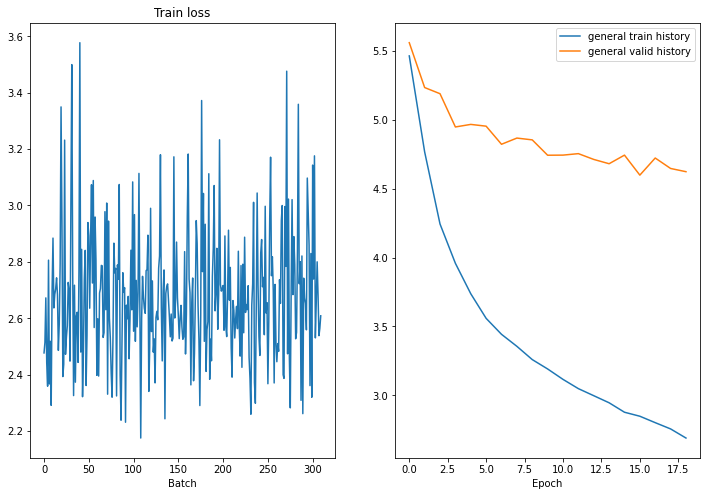

In [9]:
Image('results/graphs/exp01_g03.png')

In [10]:
get_examples(results_exp1['good_ex'][2], results_exp1['bad_ex'][2])

GOOD EXAMPLES:
Example 1
src: гостям предоставляется бесплатный wifi .
trg: free wi - fi access is available .
gen: free wi - fi access is available .
Example 2
src: апартаменты располагают телевизором , кондиционером и балконом .
trg: accommodation will provide you with a tv , air conditioning and a balcony .
gen: the accommodation will provide you with a tv , air conditioning and a balcony .
Example 3
src: в собственных ванных комнатах установлена ванна или душ .
trg: featuring a shower , private bathrooms also come with a bath or shower .
gen: the a shower , private bathrooms also come with a bath or shower .

BAD EXAMPLES:
Example 1
src: гостевой дом
trg: the
gen: is located .
Example 2
src: рядом с отелем national and suites , an collection можно посетить или исторический фермерский рынок . с региона в .
trg: discover stunning works of art at the national gallery of canada , or explore the historic 's market , ideally placed close to the national hotel and suites , an collection h

### EXPERIMENT 2: CNN ENCODER NOTEBOOK
Реализация: <a href='https://github.com/AnnaSmelova/NLP/blob/main/MADE%20NLP%20Course/Lab_2_Neural_Machine_Translation/exp_02_cnn_encoder_model.py'>exp_02_cnn_encoder_model.py</a> <br>
Эксперимент: <a href='https://github.com/AnnaSmelova/NLP/blob/main/MADE%20NLP%20Course/Lab_2_Neural_Machine_Translation/Lab_2_Neural_Machine_Translation_exp_2_cnn_encoder.ipynb'>Lab_2_Neural_Machine_Translation_exp_2_cnn_encoder.ipynb</a>

В этом эксперименте была попытка использовать свертки в качестве энкодера.<br>
В этот раз использовала 2 способа препроцессинга, так как препроцессинг BPE показал не очень хорошее качество на предыдущем шаге.<br>
Для каждого способа обучала по 20 эпох.<br>
Цели: понять, есть ли вообще смысл пытаться использовать свертки в задаче машинного перевода, и оценить BLEU.

In [11]:
results_exp2 = results.iloc[[3,4]].copy()
results_exp2

,model_name,epochs_num,train_loss,valid_loss,train_PPL,valid_PPL,BLEU,train_mins,train_secs,eval_mins,eval_secs,batch_size,good_ex,bad_ex
3,cnn_encoder_base_prep,20,3.577373,5.675825,35.779419,291.728804,8.177487e-154,22,26,0,4,128,"[{'src': 'кроме того , отель располагает площа...",[{'src': 'ко всем апартаментам можно подняться...
4,cnn_encoder_spacy_emb,20,3.543278,5.320505,34.580077,204.487083,1.156797e-01,22,7,0,4,128,[{'src': 'апартаменты « жемчужина » расположен...,"[{'src': 'поле для гольфа north .', 'trg': 'no..."


#### 2.1 CNN encoder + base preprocessing via WordPunctTokenizer

CNN encoder показал себя совсем плохо в этой задаче. Train-loss падал, то есть сеть обучалась, но valid-loss почти сразу стал расти, что говорит о переобучении.<br>
BLEU = 0

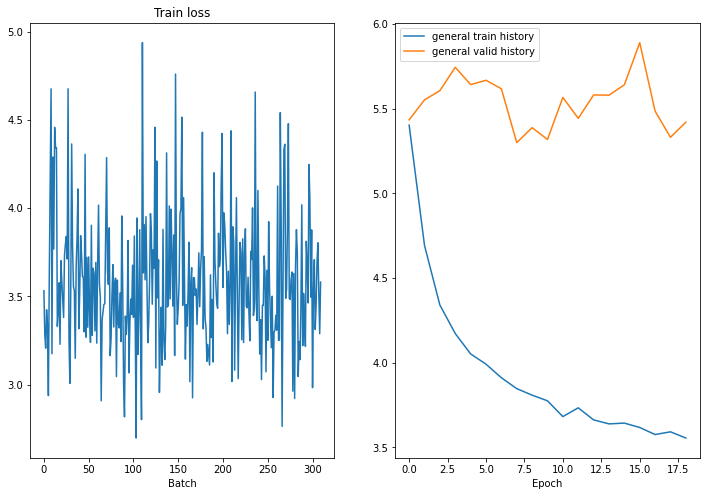

In [12]:
Image('results/graphs/exp02_g01.png')

In [13]:
get_examples(results_exp2['good_ex'][3], results_exp2['bad_ex'][3])

GOOD EXAMPLES:
Example 1
src: кроме того , отель располагает площадкой .
trg: there is also a .
gen: the is is a .
Example 2
src: работает боулинг .
trg: there is a bowling alley offered .
gen: the is is a a .
Example 3
src: обустроена общая ванная комната .
trg: there is a shared bathroom available .
gen: the is is a .

BAD EXAMPLES:
Example 1
src: ко всем апартаментам можно подняться на лифте . среди прочих удобств и услуг — услуги консьержа и круглосуточная здания . сотрудники апартаментов говорят на нескольких языках .
trg: all apartments have lift access , concierge service , multi - staff , and 24 - hour on - site security ,
gen: the is is is a .
Example 2
src: в 1 , 5 км от апартаментов apartman blanca находится торговый центр , в 2 , 5 км — центральный рынок , в 3 , 5 км — термальные ванны спа - центра , а также в 4 км — базилика святого , и государственный оперный театр . расстояние до венгерского национального музея составляет 2 , 5 км , до национального театра — 2 км , а до 

#### 2.2 CNN encoder + preprocessing via spacy

C этим препроцессингом модель показала чуть лучше качество, но оно все равно ужасно низкое.<br>
BLEU = 0.1

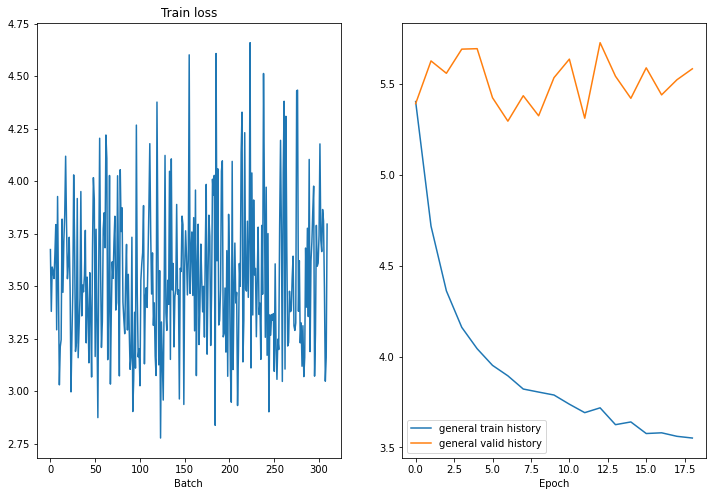

In [14]:
Image('results/graphs/exp02_g02.png')

In [15]:
get_examples(results_exp2['good_ex'][4], results_exp2['bad_ex'][4])

GOOD EXAMPLES:
Example 1
src: апартаменты « жемчужина » расположены в городе санкт - , в 10 минутах езды от залива . к услугам гостей бесплатный wi - fi .
trg: located a 10 - minute drive from the gulf of in saint petersburg , apartment offers free wifi .
gen: the is is a a - minute drive from the .
Example 2
src: отель sun palace находится в 15 минутах ходьбы от сада и в 20 минутах езды от замка .
trg: sun palace is a 15 - minute walk from the garden , and a 20 - minute drive from the castle .
gen: the is is a a - minute drive from the .
Example 3
src: этот отель находится в непосредственной близости от межштатной автомагистрали 20 , в 10 минутах езды от центра города с его достопримечательностями , такими как театр « » .
trg: located from interstate 20 , this hotel is a 10 - minute drive from downtown and its attractions , like the theatre .
gen: the is is a a - minute drive from the .

BAD EXAMPLES:
Example 1
src: поле для гольфа north .
trg: north golf course
gen: the is is a a a .

### EXPERIMENT 3: ATTENTION MODEL NOTEBOOK
Реализация: <a href='https://github.com/AnnaSmelova/NLP/blob/main/MADE%20NLP%20Course/Lab_2_Neural_Machine_Translation/exp_03_with_attention.py'>exp_03_with_attention.py</a> <br>
Эксперимент: <a href='https://github.com/AnnaSmelova/NLP/blob/main/MADE%20NLP%20Course/Lab_2_Neural_Machine_Translation/Lab_2_Neural_Machine_Translation_exp_3_attention.ipynb'>Lab_2_Neural_Machine_Translation_exp_3_attention.ipynb</a>

Ожидания: при добавлении слоя attention результат работы сети заметно улучшится.<br>
В этом эксперимента добавила механизм attention к базовой модели.<br>
Так же 2 способа препроцессинга и по 20 эпох.

In [16]:
results_exp3 = results.iloc[[5,6]].copy()
results_exp3

,model_name,epochs_num,train_loss,valid_loss,train_PPL,valid_PPL,BLEU,train_mins,train_secs,eval_mins,eval_secs,batch_size,good_ex,bad_ex
5,attention_spacy_emb,20,1.174865,4.789491,3.237706,120.240109,32.084034,33,51,0,4,128,[{'src': 'стойка регистрации работает круглосу...,"[{'src': 'гостевой дом', 'trg': 'the', 'gen': ..."
6,attention_base_prep,20,1.149732,4.750324,3.157348,115.621729,32.561035,33,29,0,5,128,[{'src': 'стойка регистрации работает круглосу...,"[{'src': 'гостевой дом', 'trg': 'the', 'gen': ..."


#### 3.1 Attention + preprocessing via spacy

В этом эксперименте loss оказался заметно ниже, качество перевода улучшилось.<br>
BLEU = 32.08.<br>
При этом видно, что модель, начиная с какой-то эпохи начинает переобучаться: train-loss падает, а valid-loss начинает расти.

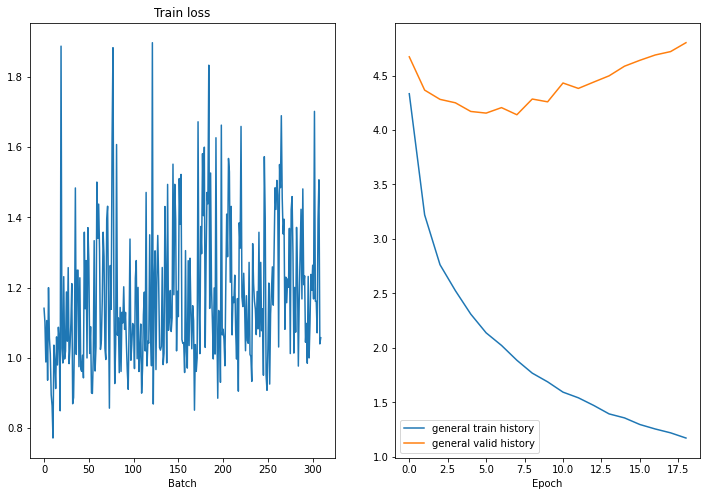

In [17]:
Image('results/graphs/exp03_g01.png')

In [18]:
get_examples(results_exp3['good_ex'][5], results_exp3['bad_ex'][5])

GOOD EXAMPLES:
Example 1
src: стойка регистрации работает круглосуточно .
trg: you will find a 24 - hour front desk at the property .
gen: you will find a 24 - hour front desk at the property .
Example 2
src: все номера оборудованы кондиционером и телевизором с плоским экраном с кабельными каналами .
trg: each room at this hotel is air conditioned and is fitted with a flat - screen tv with cable channels .
gen: every room at this hotel is air conditioned and is fitted with a flat - screen tv with cable channels .
Example 3
src: эти апартаменты с кондиционером расположены в городе сплит , в 300 метрах от дворца диоклетиана .
trg: located in split , this air - conditioned apartment is 300 metres from diocletian 's palace .
gen: set in split , this air - conditioned apartment is 300 metres from diocletian 's palace .

BAD EXAMPLES:
Example 1
src: гостевой дом
trg: the
gen: is a guest house that offers guests with a .
Example 2
src: в отеле national работают рестораны old steakhouse и .
tr

#### 3.2 Attention + base preprocessing via WordPunctTokenizer

Этот способ препроцессинга показал даже чуть лучше качество.<br>
BLEU = 32.56.<br>
здесь тоже, начиная примерно с 6-7 эпохи модель переобучается.

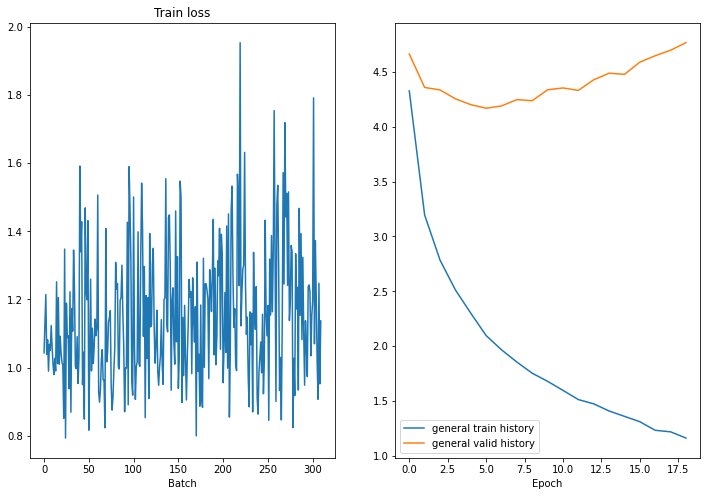

In [19]:
Image('results/graphs/exp03_g02.png')

In [20]:
get_examples(results_exp3['good_ex'][6], results_exp3['bad_ex'][6])

GOOD EXAMPLES:
Example 1
src: стойка регистрации работает круглосуточно .
trg: you will find a 24 - hour front desk at the property .
gen: you will find a 24 - hour front desk at the property .
Example 2
src: все номера оборудованы кондиционером и телевизором с плоским экраном с кабельными каналами .
trg: each room at this hotel is air conditioned and is fitted with a flat - screen tv with cable channels .
gen: every room at this hotel is air conditioned and is fitted with a flat - screen tv with cable channels .
Example 3
src: эти апартаменты с кондиционером расположены в городе сплит , в 300 метрах от дворца диоклетиана .
trg: located in split , this air - conditioned apartment is 300 metres from diocletian 's palace .
gen: set in split , this air - conditioned apartment is 300 metres from diocletian 's palace .

BAD EXAMPLES:
Example 1
src: гостевой дом
trg: the
gen: is a guest house that offers guests with a .
Example 2
src: в отеле national работают рестораны old steakhouse и .
tr

### EXPERIMENT 4: ATTENTION + POSITIONAL ENCODING MODEL NOTEBOOK
Реализация: <a href='https://github.com/AnnaSmelova/NLP/blob/main/MADE%20NLP%20Course/Lab_2_Neural_Machine_Translation/exp_04_with_attention_and_pe.py'>exp_04_with_attention_and_pe.py</a> <br>
Эксперимент: <a href='https://github.com/AnnaSmelova/NLP/blob/main/MADE%20NLP%20Course/Lab_2_Neural_Machine_Translation/Lab_2_Neural_Machine_Translation_exp_4_attention_with_positional_encoding.ipynb'>Lab_2_Neural_Machine_Translation_exp_4_attention_with_positional_encoding.ipynb</a>

Попытка добавить механизм positional encoding в предыдущую модель.<br>
Тут использовала один вид препроцессинга с помощью модуля spacy.<br>
Обучала 20 эпох.

In [21]:
results_exp4 = results.iloc[[7]].copy()
results_exp4

,model_name,epochs_num,train_loss,valid_loss,train_PPL,valid_PPL,BLEU,train_mins,train_secs,eval_mins,eval_secs,batch_size,good_ex,bad_ex
7,attention_pe_spacy_emb,20,1.62665,4.731887,5.086808,113.509525,31.112498,32,58,0,4,128,"[{'src': 'также среди удобств чайник .', 'trg'...","[{'src': 'стены апартаментов .', 'trg': 'the w..."


#### 4.1 Attention + positional encoding + preprocessing via spacy

Качество немного просело, по сравнению с предыдущей моделью.<br>
BLEU = 31.11.<br>
Точно так же, начиная с какого-то момента, модель заметно переобучается.

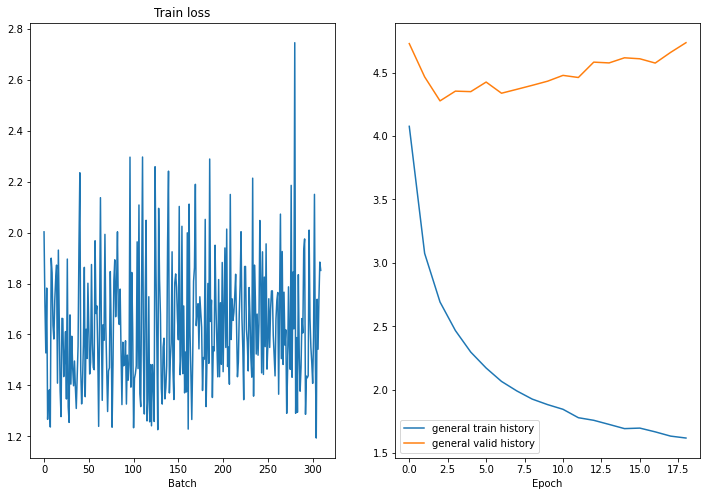

In [22]:
Image('results/graphs/exp04_g01.png')

In [23]:
get_examples(results_exp4['good_ex'][7], results_exp4['bad_ex'][7])

GOOD EXAMPLES:
Example 1
src: также среди удобств чайник .
trg: you will find a kettle in the room .
gen: you will find a kettle in the room .
Example 2
src: хостел youth находится в 30 минутах езды от железнодорожного вокзала гуанчжоу и в 40 минутах - от аэропорта байюнь .
trg: michael youth hostel is a 30 - minute drive from guangzhou railway station and a 40 - minute drive from baiyun airport .
gen: youth hostel is a 30 - minute drive from guangzhou railway station and a 40 - minute drive from baiyun airport .
Example 3
src: все номера оборудованы телевизором с плоским экраном , а в некоторых из них также обустроен гостиный уголок .
trg: the rooms come with a flat - screen tv . certain units feature a seating area where you can relax .
gen: all rooms come with a flat - screen tv . certain units feature a seating area where you can relax .

BAD EXAMPLES:
Example 1
src: стены апартаментов .
trg: the walls are painted by paolo .
gen: .
Example 2
src: в 2010 году ресторан отеля в 6 раз 

### EXPERIMENT 5: TRANSFORMER MODEL NOTEBOOK
Реализация: <a href='https://github.com/AnnaSmelova/NLP/blob/main/MADE%20NLP%20Course/Lab_2_Neural_Machine_Translation/exp_05_torch_transformer.py'>exp_05_torch_transformer.py</a> <br>
Эксперимент: <a href='https://github.com/AnnaSmelova/NLP/blob/main/MADE%20NLP%20Course/Lab_2_Neural_Machine_Translation/Lab_2_Neural_Machine_Translation_exp_5_torch_transformer.ipynb'>Lab_2_Neural_Machine_Translation_exp_5_torch_transformer.ipynb</a>

Попытка использовать трансформер для решения задачи.<br>
Использовала один вид препроцессинга с помощью модуля spacy.<br>
Обучала сначала 20 эпох, потом ради интереса попробовала обучить 50 эпох, так как трансформер обучался примерно в 2 раза быстрее остальных моделей.

In [24]:
results_exp5 = results.iloc[[8,9]].copy()
results_exp5

,model_name,epochs_num,train_loss,valid_loss,train_PPL,valid_PPL,BLEU,train_mins,train_secs,eval_mins,eval_secs,batch_size,good_ex,bad_ex
8,torch_transformer,20,0.908181,1.419685,2.479807,4.135818,40.339820,10,20,0,1,128,"[{'src': 'располагается в 10 км .', 'trg': 'is...","[{'src': 'гостевой дом', 'trg': 'the', 'gen': ..."
9,torch_transformer_50_epochs,50,0.273024,1.905235,1.313931,6.720986,39.967922,25,28,0,0,128,"[{'src': 'располагается в 10 км .', 'trg': 'is...","[{'src': 'гостевой дом', 'trg': 'the', 'gen': ..."


#### 5.1 Torch transformer + preprocessing via spacy (20 epoch)

Трансформер показал себя очень хорошо, loss заметно ниже, чем у предыдущих моделей, а BLEU - высокий.<br>
BLEU = 40.34

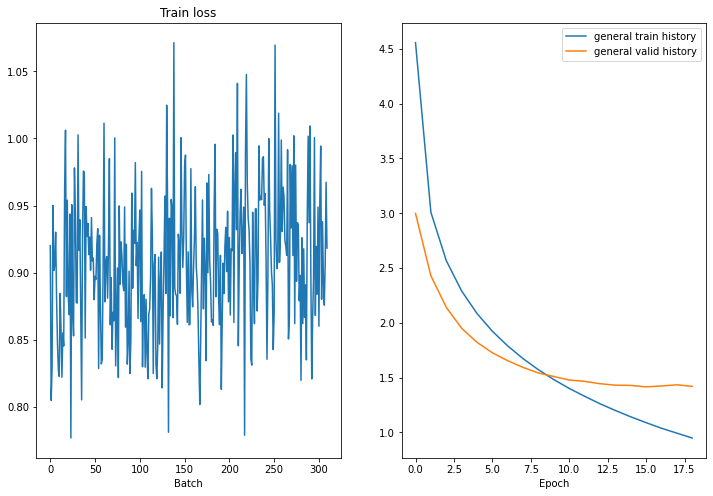

In [25]:
Image('results/graphs/exp05_g01.png')

In [26]:
get_examples(results_exp5['good_ex'][8], results_exp5['bad_ex'][8])

GOOD EXAMPLES:
Example 1
src: располагается в 10 км .
trg: is 10 km away .
gen: is 10 km away .
Example 2
src: до международного аэропорта шереметьево гости смогут добраться за 35 минут на аэроэкспрессе от белорусского железнодорожного вокзала , который находится в 10 минутах езды на метро от хостела .
trg: sheremetyevo international airport is a 35 - minute ride with aeroexpress train from belorussky train station , which is a 10 - minute metro ride from hostel .
gen: international airport is a 35 - minute ride with aeroexpress train from belorussky train station , which is a 10 - minute metro ride from hostel .
Example 3
src: в числе удобств обеденная зона , кухня с посудомоечной машиной и духовкой , а также телевизор с плоским экраном и спутниковыми каналами .
trg: there is a dining area and a kitchen complete with a dishwasher and an oven . a flat - screen tv with satellite channels is offered .
gen: is a dining area and a kitchen complete with a dishwasher and an oven . a flat - s

#### 5.1 Torch transformer + preprocessing via spacy (50 epoch)

Если посмотреть на график с 20 эпохами - на нем train-loss и valid-loss падают. Какого-то явного переобучения за 20 эпох не достигли.<br> 
Попробовала обучить 50 эпох. Ожидаемый эффект - модель начала переобучаться, причем получилось, что почти сразу после 20-й эпохи.<br>
Ну и как итог, понятно, valid-loss увеличился, а BLEU немного просел. Но качество все равно получилось хорошее.<br>
BLEU = 39.97.

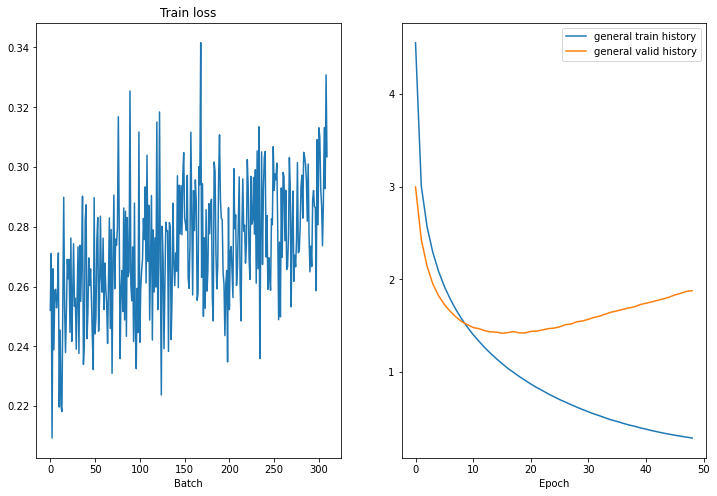

In [27]:
Image('results/graphs/exp05_g02.png')

In [28]:
get_examples(results_exp5['good_ex'][9], results_exp5['bad_ex'][9])

GOOD EXAMPLES:
Example 1
src: располагается в 10 км .
trg: is 10 km away .
gen: is 10 km away .
Example 2
src: апартаменты располагают телевизором с плоским экраном , кондиционером , гостиным уголком , а также кухней с микроволновой печью и холодильником .
trg: accommodation will provide you with a flat - screen tv , air conditioning and a seating area . there is a kitchen with a microwave and a refrigerator .
gen: will provide you with a flat - screen tv , air conditioning and a seating area . there is a kitchen with a microwave and a refrigerator .
Example 3
src: до международного аэропорта шереметьево гости смогут добраться за 35 минут на аэроэкспрессе от белорусского железнодорожного вокзала , который находится в 10 минутах езды на метро от хостела .
trg: sheremetyevo international airport is a 35 - minute ride with aeroexpress train from belorussky train station , which is a 10 - minute metro ride from hostel .
gen: international airport is a 35 - minute ride with aeroexpress trai

## CONCLUSION

### Metrics

По метрикам лучший результат показал **transformer** с BLEU = 40.34.<br>
Также хорошие результаты получились у моделей с **attention**. <br>
Модель **attention + positional encoding** имеет высокий BLEU, но это за счет механизма attention, positional encoding не дал преимуществ.

In [29]:
def get_style(val):
    if val > 25:
        return 'color:green;'
    elif val > 20:
        return 'color:orange;'
    elif val > 18:
        return 'color:red;'
    else:
        return ''

pd.options.display.float_format = '{:,.2f}'.format
results[['model_name', 'valid_loss', 'BLEU']].sort_values(by=['BLEU', 'valid_loss'], ascending=False).style.applymap(get_style, subset=['BLEU'])


,model_name,valid_loss,BLEU
8,torch_transformer,1.419685,40.339820
9,torch_transformer_50_epochs,1.905235,39.967922
6,attention_base_prep,4.750324,32.561035
5,attention_spacy_emb,4.789491,32.084034
7,attention_pe_spacy_emb,4.731887,31.112498
0,baseline_base_prep,4.706754,17.472842
2,baseline_spacy_emb,4.598027,14.592864
1,baseline_bpe_prep,5.131070,12.162282
4,cnn_encoder_spacy_emb,5.320505,0.115680
3,cnn_encoder_base_prep,5.675825,0.000000


### Train time

In [30]:
results['train_time'] = results['train_mins'] * 60 + results['train_secs'] 
results['train_epoch_time'] = results['train_time'] / results['epochs_num']
results['inference_time'] = (results['eval_mins'] * 60 + results['eval_secs'])
results['inference_time_32'] = results['inference_time'] * 32 / results['batch_size']
results['loss_diff'] = results['valid_loss'] - results['train_loss']

По скорости обучения модели также лидирует transformer. Он обучался вдвое быстрее остальных моделей.<br>
Дольше всех обучались модели с attention.

In [31]:
results[['model_name', 'train_epoch_time']].sort_values(by=['train_epoch_time'], ascending=True)

,model_name,train_epoch_time
9,torch_transformer_50_epochs,30.56
8,torch_transformer,31.00
4,cnn_encoder_spacy_emb,66.35
3,cnn_encoder_base_prep,67.30
2,baseline_spacy_emb,76.85
0,baseline_base_prep,77.55
1,baseline_bpe_prep,79.95
7,attention_pe_spacy_emb,98.90
6,attention_base_prep,100.45
5,attention_spacy_emb,101.55


### Inference time

Во всех моделях размер батча у меня был 128. Пересчитала скорость инференса на размер батча 32, хотя относительная разница и так видна.<br>
Самый быстрый - transformer, самый медленный - attention.

In [32]:
results[['model_name', 'inference_time', 'inference_time_32']].sort_values(by=['inference_time'], ascending=True)

,model_name,inference_time,inference_time_32
9,torch_transformer_50_epochs,0,0.00
8,torch_transformer,1,0.25
1,baseline_bpe_prep,3,0.75
0,baseline_base_prep,4,1.00
2,baseline_spacy_emb,4,1.00
3,cnn_encoder_base_prep,4,1.00
4,cnn_encoder_spacy_emb,4,1.00
5,attention_spacy_emb,4,1.00
7,attention_pe_spacy_emb,4,1.00
6,attention_base_prep,5,1.25


### Overfitting

Степень переобучения оценим разностью valid-loss и train-loss.<br>
Меньше всего переобучился transformer, больше всего attention.

In [33]:
results[['model_name', 'train_loss', 'valid_loss', 'loss_diff']].sort_values(by=['loss_diff'], ascending=True)

,model_name,train_loss,valid_loss,loss_diff
8,torch_transformer,0.91,1.42,0.51
9,torch_transformer_50_epochs,0.27,1.91,1.63
1,baseline_bpe_prep,3.47,5.13,1.66
4,cnn_encoder_spacy_emb,3.54,5.32,1.78
2,baseline_spacy_emb,2.68,4.60,1.92
0,baseline_base_prep,2.66,4.71,2.05
3,cnn_encoder_base_prep,3.58,5.68,2.10
7,attention_pe_spacy_emb,1.63,4.73,3.11
6,attention_base_prep,1.15,4.75,3.60
5,attention_spacy_emb,1.17,4.79,3.61


В общем, по всем показателям **transformer** - лучшая модель для данной задачи.